In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import numpy.ma as ma
import matplotlib.mlab as mlab

<IPython.core.display.Javascript object>


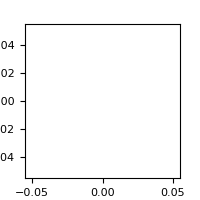

In [52]:
%matplotlib notebook
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

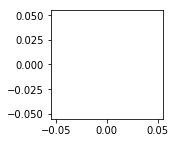

In [44]:
%matplotlib inline
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

In [318]:
dfmg = pd.read_csv("dfmg_corrected_DIST_GLINE.csv")
dfgamma = pd.read_csv("gamman.csv", names=['PROFILE_NUMBER', 'gamman'])
dfmg['gamman'] = dfgamma['gamman']
del dfmg['Unnamed: 0']
dfmg.loc[:,'JULD'] = pd.to_datetime(dfmg.loc[:, 'JULD'])
dfmg.loc[(dfmg['gamman'] < 0), "gamman"] = np.nan

In [7]:
import plot_stations as pltStn
import importlib
importlib.reload(pltStn)

import plot_bathy as pltBathy
import importlib
importlib.reload(pltBathy)

import find_depth_averages_v2 as averageProfile
import plot_var_contours_with_distance as plt2dDepthVsDist

import plot_station_bot_sal as pbs

import plot_topView_contourf as topView
importlib.reload(topView)

import plot_monthly_count as monthCount
importlib.reload(monthCount)

import plot_profiles_vs_dist as profDist

import plot_Profiles_vs_time as profile2dTime

import plotProfileNumber as viewProf

In [266]:
WSO_source = (dfmg['CTEMP'] <= -1.7 ) & (dfmg["PSAL_ADJUSTED"] > 34.5)
WSO_prod = (dfmg['CTEMP'] <= -0.8) & (dfmg['CTEMP'] >= -1.2) & (dfmg["PSAL_ADJUSTED"] > 34.5)

box1 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box2 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)
box3 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -60) & (dfmg["LONGITUDE"] < -40)
box4 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -40) & (dfmg["LONGITUDE"] < -20)

box5 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box6 = (dfmg["LATITUDE"] > -80) & (dfmg["LATITUDE"] < -75) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)
box7 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > 160) & (dfmg["LONGITUDE"] < 180)
box8 = (dfmg["LATITUDE"] > -75) & (dfmg["LATITUDE"] < -70) & (dfmg["LONGITUDE"] > -180) & (dfmg["LONGITUDE"] < -160)

box9 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 60) & (dfmg["LONGITUDE"] < 70)
box10 = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 82)

Weddell = (box1 | box2 | box3| box4)
Ross = (box5 | box6 | box7 | box8) & (dfmg.LATITUDE < -72.5)
Prydz = box10
EBS = (dfmg['LONGITUDE'] > -80) & (dfmg['LONGITUDE'] < -60) #Eastern Bellingshausen Sea
WBS = (dfmg['LONGITUDE'] > -100) & (dfmg['LONGITUDE'] < -80) # Western Bellingshausen Sea
BS = (EBS + WBS)
Adelie = (dfmg['LONGITUDE'] > 135) & (dfmg['LONGITUDE'] < 145) # Adelie Coast
Knox = (dfmg['LONGITUDE'] > 101) & (dfmg['LONGITUDE'] < 112) 
PrincessMartha = (dfmg['LONGITUDE'] > -20) & (dfmg['LONGITUDE'] < 0) & (dfmg.LATITUDE <= -65)
CDP = box9
WPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 70) & (dfmg["LONGITUDE"] < 75)
EPB = (dfmg["LATITUDE"] > -70) & (dfmg["LATITUDE"] < -65) & (dfmg["LONGITUDE"] > 75) & (dfmg["LONGITUDE"] <= 82)
AmundsenEast = (dfmg.LONGITUDE <= -100) & (dfmg.LONGITUDE >= -110) & (dfmg.LATITUDE <= -70)
AmundsenWest = (dfmg.LONGITUDE <= -110) & (dfmg.LONGITUDE >= -120) & (dfmg.LATITUDE <= -70)
Amundsen = AmundsenEast + AmundsenWest
AS = (AmundsenEast + AmundsenWest)
LAC = (dfmg.LONGITUDE > 82) & (dfmg.LONGITUDE <= 87) & (dfmg.LATITUDE <= -65)# Leopold and Astrid Coast
QMC = (dfmg.LONGITUDE > 87) & (dfmg.LONGITUDE <= 96.5) & (dfmg.LATITUDE <= -65)# Wilhelm II Coast and Queen Mary Coast
Harald = (dfmg.LONGITUDE >= 29) & (dfmg.LONGITUDE <= 37) & (dfmg.LATITUDE <= -65)# Harald Coast

lowSurfSal = (dfmg['PSAL_ADJUSTED'] < 33.5) & (dfmg['DEPTH'] > -100)
ASW = (dfmg.CTEMP > -1.5) & (dfmg.PRES_ADJUSTED < 150) & (dfmg.POT_DENSITY < 27.4)
surfaceWaters = dfmg.PRES_ADJUSTED < 100

maxTemp = (dfmg.groupby('PROFILE_NUMBER')['CTEMP'].transform(max) == dfmg['CTEMP'])
gline_le_50km = dfmg['DIST_GLINE'] <= 50
gline_le_100km = dfmg['DIST_GLINE'] <= 100
gline_le_150km = dfmg['DIST_GLINE'] <= 150
gline_le_25km = dfmg['DIST_GLINE'] <= 25
gline_le_75km = dfmg['DIST_GLINE'] <= 75

mask_theta_sal_not_nan = ~(dfmg.loc[:, 'CTEMP'].isnull() + dfmg.loc[:, 'PSAL_ADJUSTED'].isnull())

deepMask250 = dfmg.DEPTH <= -250
deepMask375 = dfmg.DEPTH <= -375
deepMask500 = dfmg.DEPTH <= -500

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [267]:
year_mask = []
years = np.sort(dfmg['JULD'].dt.year.unique())
for i in range(len(years)):
    mask = dfmg['JULD'].dt.year == years[i]
    year_mask.append(mask)
month_mask = []
for i in range(12):
    mask = dfmg['JULD'].dt.month == i+1
    month_mask.append(mask)
    
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [268]:
def sel_months(df, months=[1]):
    return df['JULD'].dt.month.isin(months)

def sel_years(df, years=[2011]):
    return df['JULD'].dt.year.isin(years)
    
def get_mask_from_prof_mask(df, profmask):
    profs = dfmg.loc[profmask, 'PROFILE_NUMBER'].unique()
    mask = dfmg.loc[:, 'PROFILE_NUMBER'].isin(profs)
    
    return mask

def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))

In [269]:
DSW = (dfmg.gamman > 28.27) & (dfmg.PSAL_ADJUSTED > 34.4) & (dfmg.CTEMP <= -1.8)
lssw = (dfmg.PSAL_ADJUSTED >= 34.3) & (dfmg.PSAL_ADJUSTED <= 34.4) & (dfmg.CTEMP <= -1.5) & (dfmg.CTEMP > -1.9)
ISW = (dfmg.CTEMP < -1.9)

CDW = (dfmg.CTEMP >= 0) & (dfmg.PSAL_ADJUSTED >= 34.5)
mCDW = (dfmg.CTEMP < 0) & (dfmg.CTEMP > -1.8) & (dfmg.gamman > 28) & (dfmg.gamman < 28.27)

In [270]:
salrange = list(np.arange(33.5, 35.05, 0.01))
salrange_disc = list(np.arange(33.5, 35.05, 0.1))
thetarange = list(np.arange(-3, 1, 0.01))
thetarange_disc = list(np.linspace(-3, 1, 10))
RossYears = [2010, 2011, 2012, 2014]
WeddellYears= [2007, 2009, 2011]
PrydzYears = [2011, 2012, 2013, 2015]

In [271]:
def count_months(ydf):
    uniqueProfsIndices = ydf.groupby("PROFILE_NUMBER").tail(1).index
    
    return ydf.loc[uniqueProfsIndices].groupby(pd.cut(ydf.loc[uniqueProfsIndices].JULD.dt.month, 
                                                      np.arange(0,13,1))).JULD.count().values

In [272]:
def plot_timeHist(df):
    years = np.sort(df.JULD.dt.year.unique())
    months = list(np.arange(1,13,1)) * len(years)
    monthCount = count_months(df)
    

In [273]:
years = np.sort(dfmg.JULD.dt.year.unique())
print(years)
monthCount = np.stack(dfmg.groupby(pd.cut(dfmg.JULD.dt.year, years)).apply(count_months) )

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]


# Slope Front Analysis

In [17]:
mPrydz = topView.createMapProjections(-90, 0, region="Prydz")

Got the below bounding box by analyzing the profile locations in CDP using plotProfileNumber.plotProfileNumberContours(dfmg[CDP], m=mPrydz, pfno_include=['00021384']), where pfno stands for PLATFORM_NUMBER

In [150]:
importlib.reload(viewProf)

<module 'plotProfileNumber' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plotProfileNumber.py'>

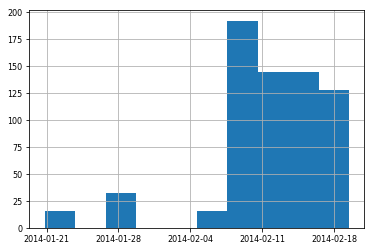

In [320]:
plt.close(1)
plt.figure(1)
boundingBox = viewProf.get_bounding_box(mPrydz, 5.97313e6, 8.83841e6, 6.0149e6, 8.8648e6)
selectProfiles = viewProf.get_box_dfselector(dfmg, [boundingBox[0], boundingBox[2]])
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2014]) ].JULD.hist()
plt.show()

In [155]:
boundingBox

[[65.83998043836696, -66.90287134503806],
 [66.787776295757, -66.90287134503806],
 [66.787776295757, -66.7090127038635],
 [65.83998043836696, -66.7090127038635]]

In [322]:
importlib.reload(profDist)

<module 'plot_profiles_vs_dist' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py'>

In [275]:
levels = [27.7, 27.8, 27.9, 28, 28.1, 28.2, 28.27, 28.35, 28.4]
levels

[27.7, 27.8, 27.9, 28, 28.1, 28.2, 28.27, 28.35, 28.4]

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


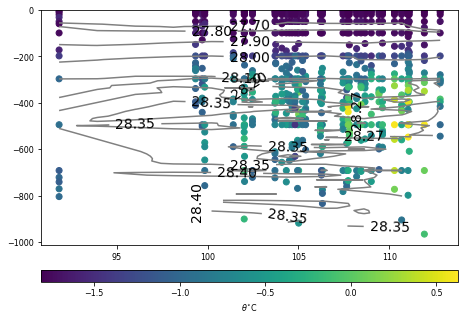

In [276]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2014) & (dfmg.JULD.dt.month == 2)
profDist.plotProfDist_in_BoundingBox(dfmg.loc[selectPeriod], boundingBox=[boundingBox[0], boundingBox[2]], 
                                     plotTimeHist=False, levels=levels, plotEcho=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


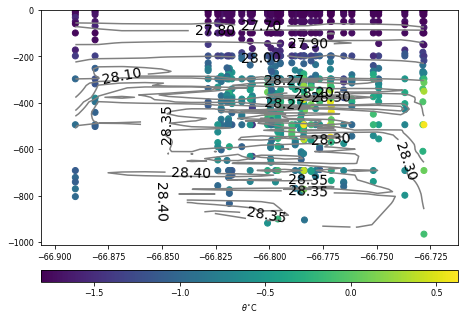

In [349]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2014) & (dfmg.JULD.dt.month == 2)
profDist.plotProfDist_in_BoundingBox(dfmg.loc[selectPeriod], boundingBox=[boundingBox[0], boundingBox[2]], 
                                     plotTimeHist=False, levels=levels, plotEcho=False, xlat=True)

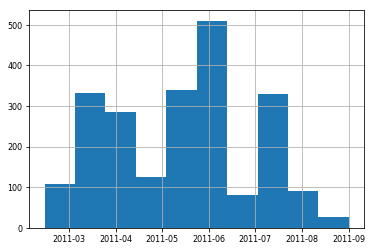

In [350]:
plt.close(1)
plt.figure(1)
boundingBox2 = viewProf.get_bounding_box(mPrydz, 6115471.6818 , 8857416.02885, 6141685.79287 , 8885655.77577)
boundingBox2 = [ boundingBox2[0], boundingBox2[2] ]
selectProfiles = viewProf.get_box_dfselector(dfmg, boundingBox2)
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2011]) ].JULD.hist()
plt.show()

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


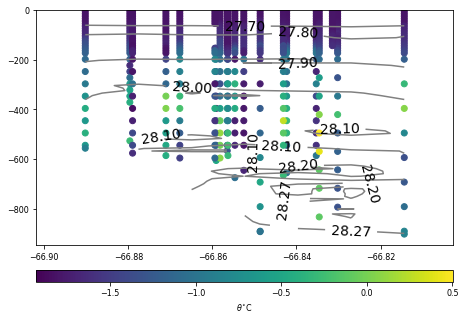

In [353]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 3)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, 
                                     levels=levels, xlat=True)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


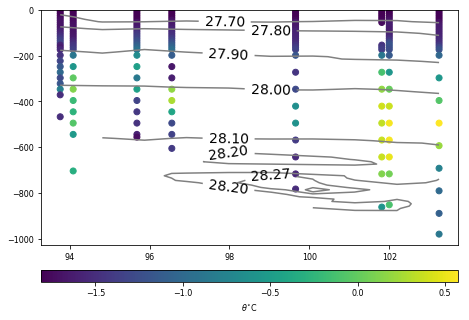

In [354]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


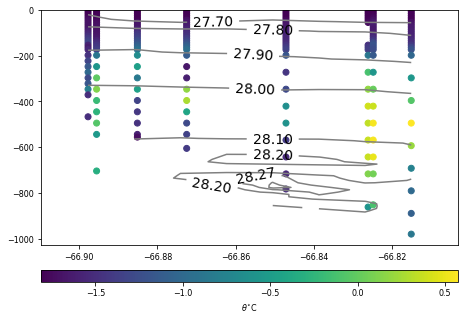

In [355]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, 
                                     levels=levels, xlat=True)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


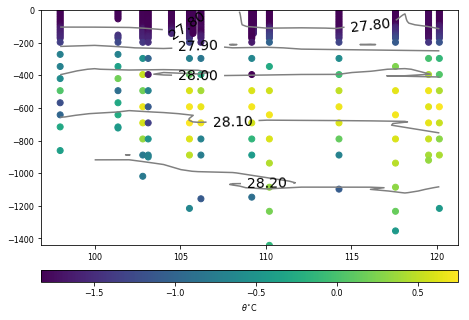

In [356]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 6)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:164: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


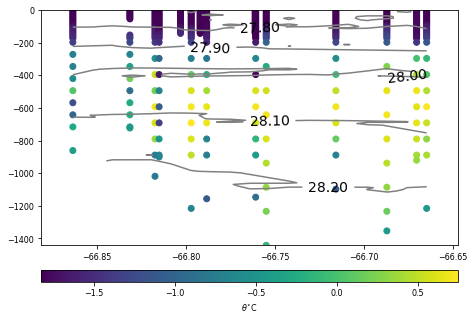

In [357]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 6)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, 
                                     levels=levels, xlat=True)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


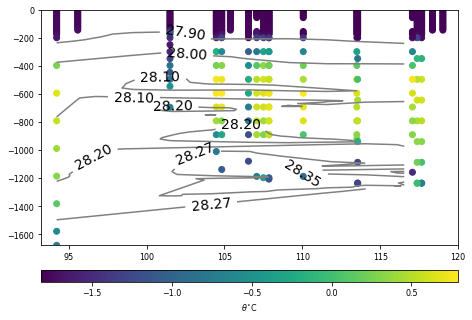

In [281]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 7)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


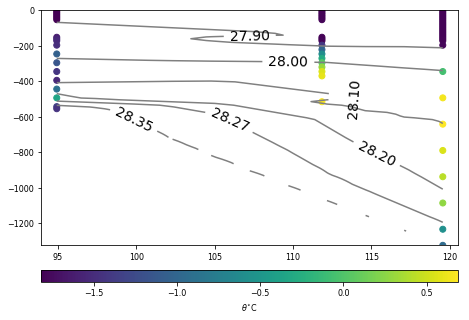

In [282]:
dfmg["ABSDEPTH"] = abs(dfmg["DEPTH"])
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 8)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox2, plotTimeHist=False, levels=levels)

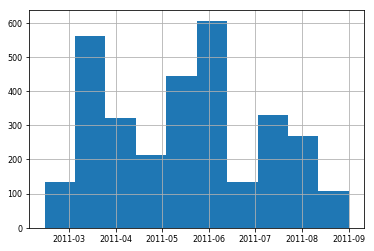

In [283]:
boundingBox3 = [[69.03487386835869, -66.98537146578394], [69.76838268643952, -66.54203221189445] ]
plt.close(1)
plt.figure(1)
selectProfiles = viewProf.get_box_dfselector(dfmg, boundingBox3)
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2011]) ].JULD.hist()
plt.show()

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


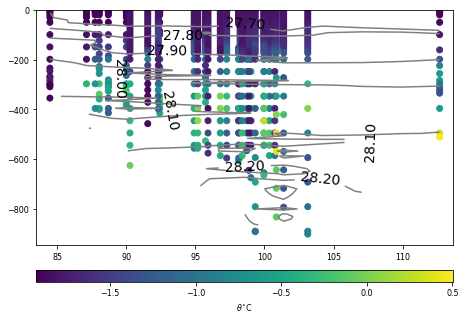

In [284]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 3)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


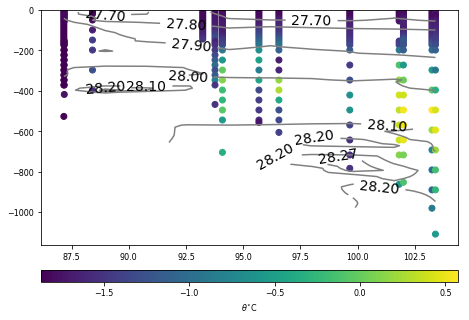

In [285]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


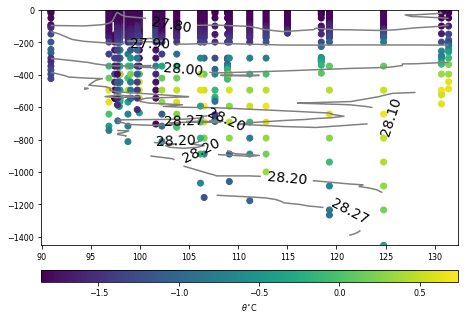

In [286]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 5)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


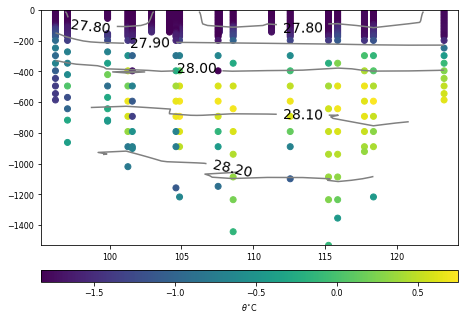

In [199]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 6)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


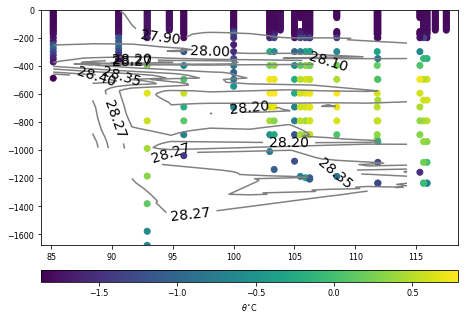

In [202]:
boundingBox = [[69.03487386835869, -66.98537146578394], [69.76838268643952, -66.54203221189445] ]
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 7)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox3, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


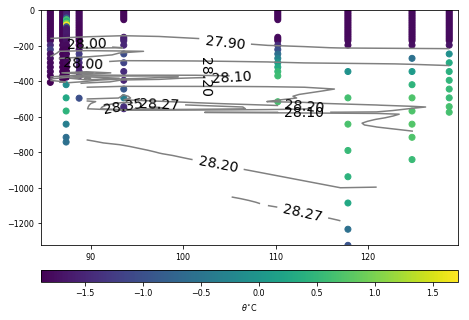

In [203]:
boundingBox = [[69.03487386835869, -66.98537146578394], [69.76838268643952, -66.54203221189445] ]
importlib.reload(profDist)
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 8)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox, plotTimeHist=False, levels=levels)

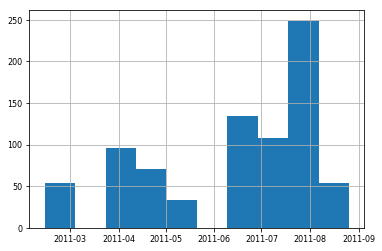

In [204]:
boundingBox4 = [[68.569779989595, -67.01124062294747], [68.91110100858128, -66.73031572879327]]
plt.close(1)
plt.figure(1)
selectProfiles = viewProf.get_box_dfselector(dfmg, boundingBox4)
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2011]) ].JULD.hist()
plt.show()

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


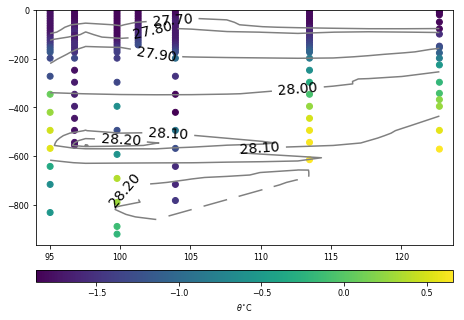

In [205]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox4, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


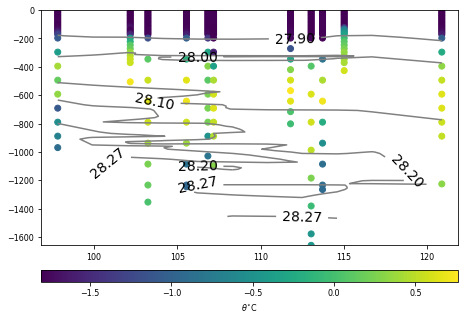

In [206]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 7)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox4, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


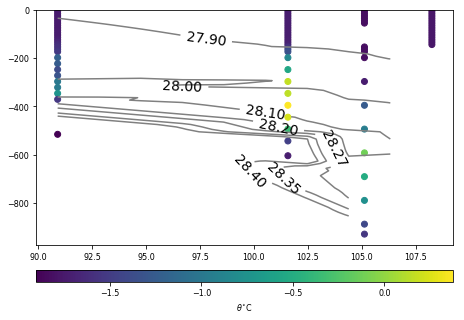

In [207]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 8)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox4, plotTimeHist=False, levels=levels)

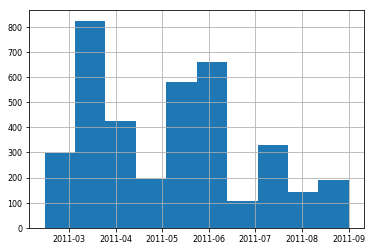

In [208]:
boundingBox5 = [[69.06858067227954, -66.93977011744948], [70.07595848160302, -66.60389561121683]]
plt.close(1)
plt.figure(1)
selectProfiles = viewProf.get_box_dfselector(dfmg, boundingBox5)
dfmg.loc[selectProfiles & sel_years(dfmg, years=[2011]) ].JULD.hist() #
plt.show()

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


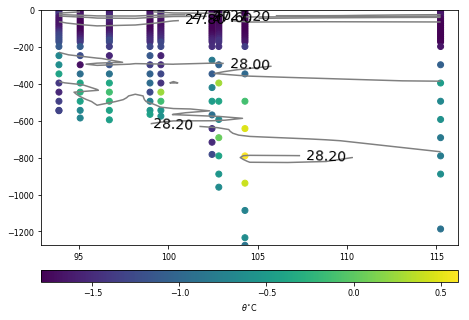

In [209]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 2)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


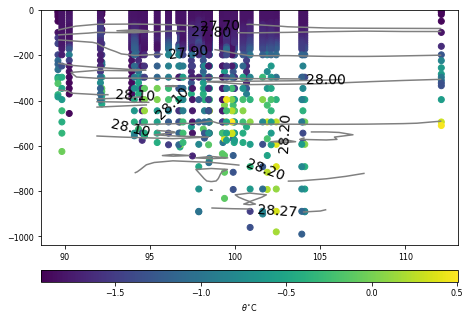

In [211]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 3)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


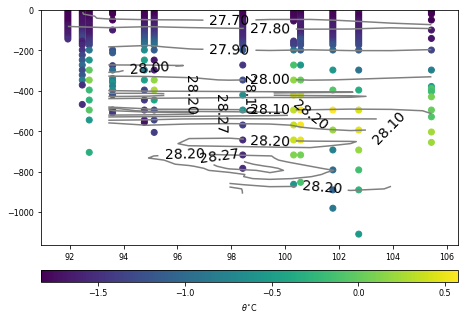

In [212]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 4)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


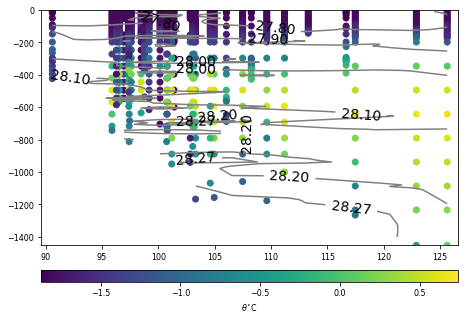

In [213]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 5)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


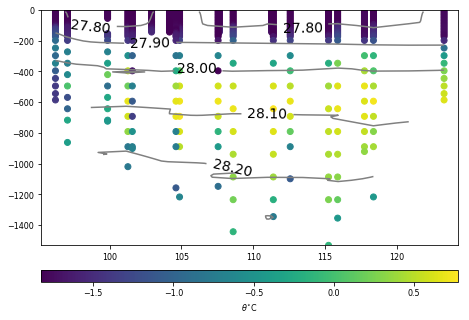

In [214]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 6)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


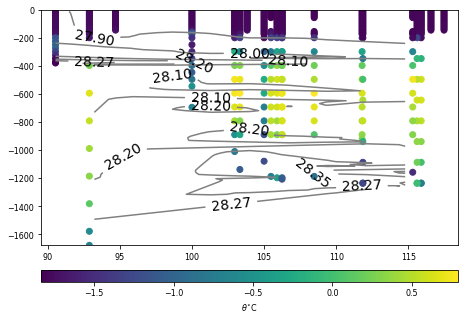

In [216]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 7)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_profiles_vs_dist.py:157: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.
  gamman_interpolated = mlab.griddata(dist, depth, gamman, dist_grid, depth_grid, interp='linear')


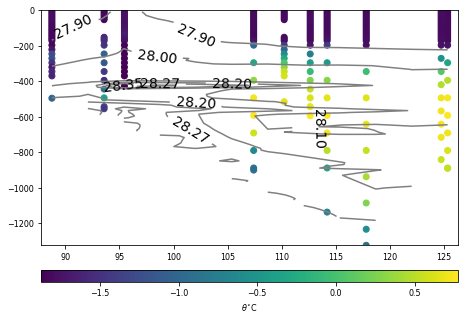

In [217]:
selectPeriod = (dfmg.JULD.dt.year == 2011) & (dfmg.JULD.dt.month == 8)
profDist.plotProfDist_in_BoundingBox(dfmg[selectPeriod], boundingBox=boundingBox5, plotTimeHist=False, levels=levels)

In [287]:
acrossASF = pd.read_excel("AcrossASFpathways.xlsx")

In [288]:
acrossASF

,REGION,PLATFORM_NUMBER,PROFILE_NUMBER,Remarks,year,month
0,CDP,21384.0,"200398, 200399, 200400, 200401, 200402, 200404",acrossASF,NaN,NaN
1,CDP,48288.0,"15210, 15211, 15214, 15217",acrossASF,NaN,NaN
2,CDP,48258.0,"12812, 12814, 12815, 12816, 12820, 12822, 1282...",acrossASF,NaN,NaN
3,CDP,62970.0,"29708, 29709, 29710, 29711, 29712, 29713, 2971...",acrossASF,NaN,NaN
4,CDP,63012.0,"30155, 30156, 30157, 30158, 30159, 301560, 30161",acrossASF,NaN,NaN
5,CDP,63012.0,"30163, 30165, 30166, 30167, 30168, 30169, 30170",acrossASF,NaN,NaN
6,CDP,19788.0,"75880, 75881, 75882, 75883, 75884, 75885, 7588...",acrossASF,NaN,NaN
7,CDP,19824.0,"92522, 92523, 92524, 92525, 92526, 92527, 9252...",acrossASF,NaN,NaN
8,CDP,22398.0,"94318, 94320, 94347, 94348, 94349, 94350",acrossASF,NaN,NaN
9,CDP,22404.0,"96176, 96174, 96175, 96180",acrossASF,NaN,NaN


In [55]:
acrossASF.loc[0].PLATFORM_NUMBER

21384

In [56]:
dfmg.columns

Index(['JULD', 'LATITUDE', 'LONGITUDE', 'PLATFORM_NUMBER', 'POSITION_QC',
       'PRES_ADJUSTED', 'PRES_ADJUSTED_ERROR', 'PRES_ADJUSTED_QC',
       'PROFILE_NUMBER', 'PSAL_ADJUSTED', 'PSAL_ADJUSTED_ERROR',
       'PSAL_ADJUSTED_QC', 'TEMP_ADJUSTED', 'TEMP_ADJUSTED_ERROR',
       'TEMP_ADJUSTED_QC', 'DEPTH', 'DENSITY_INSITU', 'POT_DENSITY', 'CTEMP',
       'SA', 'DIST_GLINE', 'ECHODEPTH', 'gamman', 'ABSDEPTH'],
      dtype='object')

In [301]:
def plot_AcrossASF(acASF, dfmg, wd=7, ht=4, savefig=False, savename="untitled.png", levels=[], xlat=False):
    plt.close(1)
    fig = plt.figure(1, figsize=(wd, ht))
    ax = plt.subplot()
    
    pfno = acASF.PLATFORM_NUMBER
    profs = acASF.PROFILE_NUMBER
    profs = [int(x) for x in profs.split(',')]
    dfSelect = dfmg.PROFILE_NUMBER.isin(profs)
    
    ctemps = dfmg.loc[dfSelect, "CTEMP"]
    if xlat:
        dist_gline = dfmg.loc[dfSelect, "LATITUDE"]
    else:
        dist_gline = dfmg.loc[dfSelect, "DIST_GLINE"]
    depth = dfmg.loc[dfSelect, "DEPTH"]
    gamman = dfmg.loc[dfSelect, "gamman"]
    if xlat:
        ndist = int(dfmg.loc[dfSelect, 'DIST_GLINE'].max() / 0.1)
    else:
        ndist = int(dfmg.loc[dfSelect, 'DIST_GLINE'].max() / 10.)
    
    dist_grid = np.linspace(np.min(dist_gline), np.max(dist_gline), ndist)
    ndepth = int(np.abs(dfmg.loc[dfSelect, 'DEPTH'].min()) / 10.)
    depth_grid = np.linspace(dfmg.loc[dfSelect, 'DEPTH'].min(), 0, ndepth)
    
    gamman_interpolated = mlab.griddata(dist_gline, depth, gamman, dist_grid, depth_grid, interp='linear')
    
    cs = ax.scatter(dist_gline, depth, c=ctemps)
        
    if levels:
        cs_gamman = ax.contour(dist_grid, depth_grid, gamman_interpolated, levels, colors='0.5')
    else:
        cs_gamman = ax.contour(dist_grid, depth_grid, gamman_interpolated, colors='0.5')
    ax.clabel(cs_gamman, colors='k', fontsize=14, fmt='%3.2f')
    
    if savefig:
        plt.savefig(savename, dpi=300)
    plt.show()

In [302]:
levels = [27.7, 27.8, 27.9, 28, 28.1, 28.2, 28.27, 28.3, 28.35, 28.4]

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


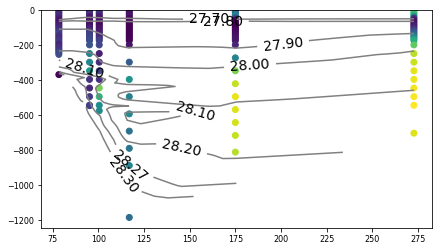

In [303]:
plot_AcrossASF(acrossASF.loc[0], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


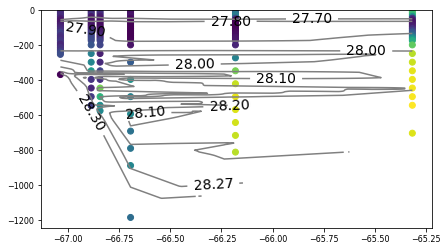

In [304]:
plot_AcrossASF(acrossASF.loc[0], dfmg, levels=levels, xlat=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


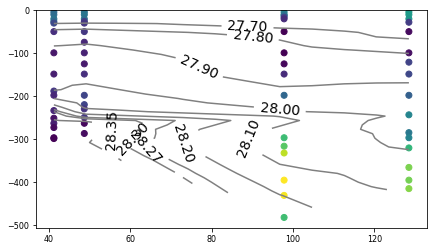

In [305]:
plot_AcrossASF(acrossASF.loc[1], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


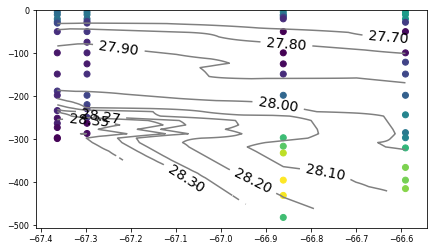

In [306]:
plot_AcrossASF(acrossASF.loc[1], dfmg, levels=levels, xlat=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


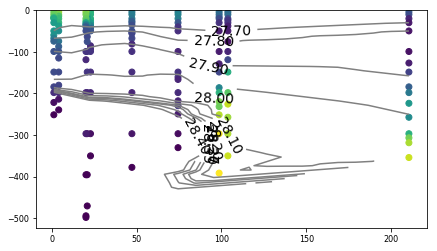

In [307]:
plot_AcrossASF(acrossASF.loc[2], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


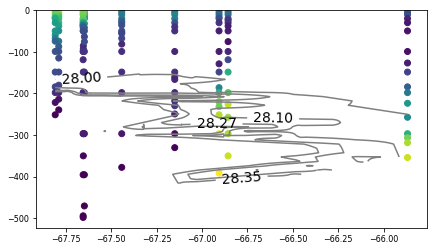

In [313]:
plot_AcrossASF(acrossASF.loc[2], dfmg, levels=[28, 28.1, 28.27, 28.35], xlat=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


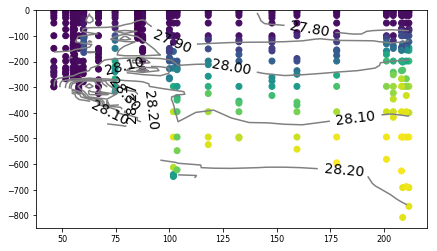

In [314]:
plot_AcrossASF(acrossASF.loc[3], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


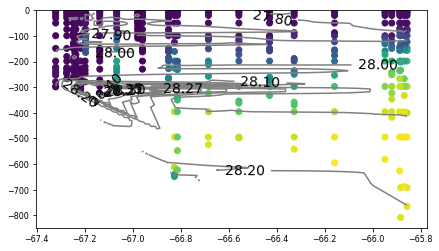

In [315]:
plot_AcrossASF(acrossASF.loc[3], dfmg, levels=levels, xlat=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


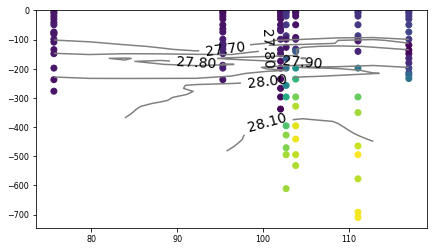

In [316]:
plot_AcrossASF(acrossASF.loc[5], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


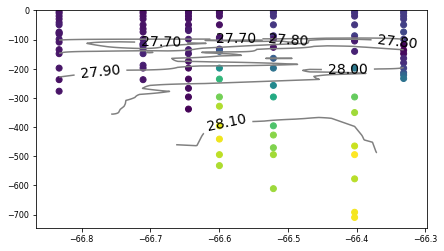

In [317]:
plot_AcrossASF(acrossASF.loc[5], dfmg, levels=levels, xlat=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


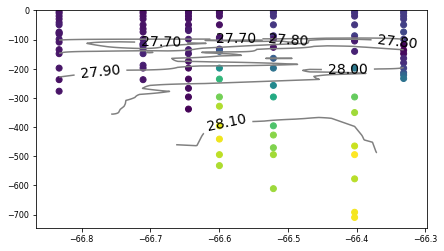

In [312]:
plot_AcrossASF(acrossASF.loc[5], dfmg, levels=levels, xlat=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


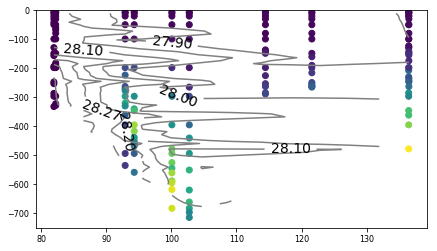

In [225]:
plot_AcrossASF(acrossASF.loc[6], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


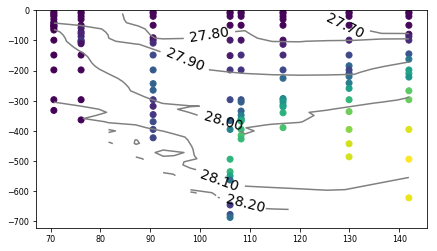

In [226]:
plot_AcrossASF(acrossASF.loc[7], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


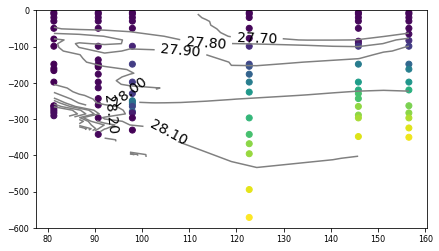

In [234]:
plot_AcrossASF(acrossASF.loc[8], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


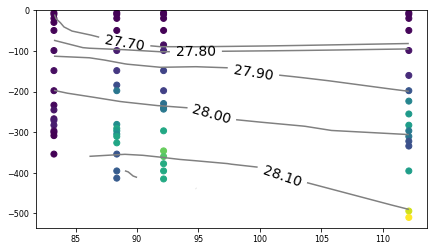

In [235]:
plot_AcrossASF(acrossASF.loc[9], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


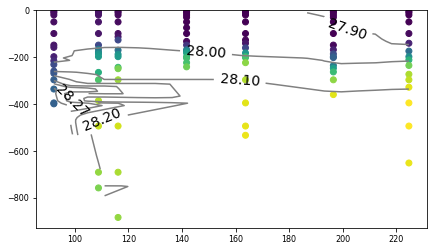

In [236]:
plot_AcrossASF(acrossASF.loc[10], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


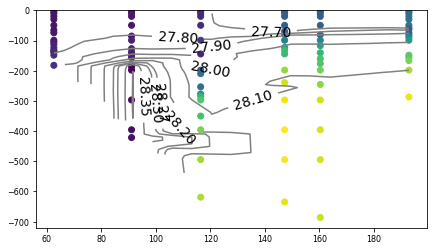

In [237]:
plot_AcrossASF(acrossASF.loc[11], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


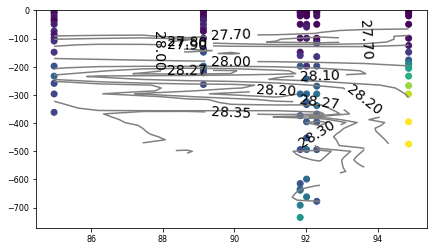

In [238]:
plot_AcrossASF(acrossASF.loc[12], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


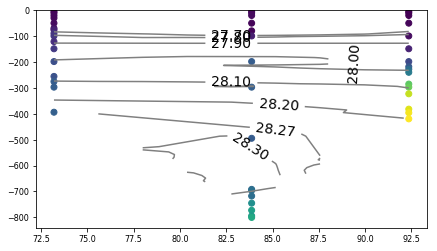

In [239]:
plot_AcrossASF(acrossASF.loc[13], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


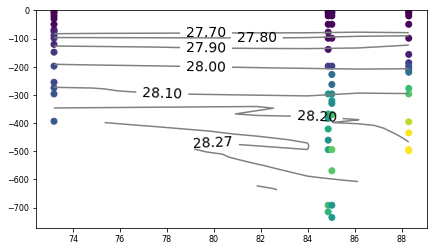

In [240]:
plot_AcrossASF(acrossASF.loc[14], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


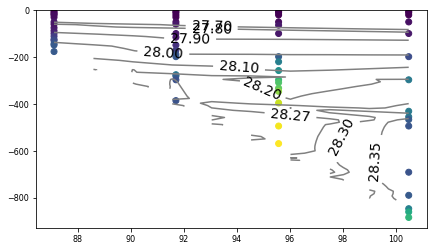

In [241]:
plot_AcrossASF(acrossASF.loc[15], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


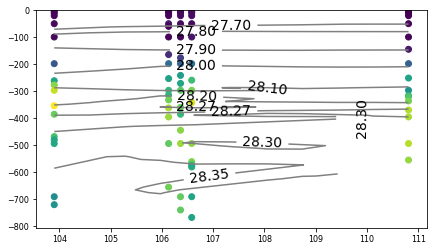

In [242]:
plot_AcrossASF(acrossASF.loc[16], dfmg, levels=levels)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The griddata function was deprecated in version 2.2. Use scipy.interpolate.griddata instead.


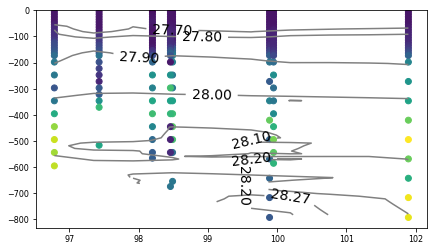

In [258]:
plot_AcrossASF(acrossASF.loc[20], dfmg, levels=levels)

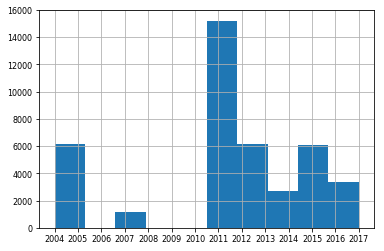

In [245]:
plt.close(1)
plt.figure(1)
dfmg.loc[CDP, "JULD"].dt.year.hist()
plt.xticks(np.arange(2004, 2018))
plt.show()

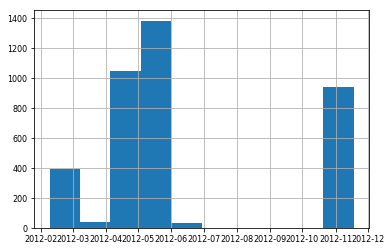

In [358]:
plt.close(1)
plt.figure(1)
dfmg.loc[CDP & sel_years(dfmg, [2012]), "JULD"].hist()

plt.show()

In [263]:
dfmg.columns

Index(['JULD', 'LATITUDE', 'LONGITUDE', 'PLATFORM_NUMBER', 'POSITION_QC',
       'PRES_ADJUSTED', 'PRES_ADJUSTED_ERROR', 'PRES_ADJUSTED_QC',
       'PROFILE_NUMBER', 'PSAL_ADJUSTED', 'PSAL_ADJUSTED_ERROR',
       'PSAL_ADJUSTED_QC', 'TEMP_ADJUSTED', 'TEMP_ADJUSTED_ERROR',
       'TEMP_ADJUSTED_QC', 'DEPTH', 'DENSITY_INSITU', 'POT_DENSITY', 'CTEMP',
       'SA', 'DIST_GLINE', 'ECHODEPTH', 'gamman', 'ABSDEPTH'],
      dtype='object')

In [250]:
dfmg[(dfmg.PROFILE_NUMBER == 186206)]

,JULD,LATITUDE,LONGITUDE,PLATFORM_NUMBER,POSITION_QC,PRES_ADJUSTED,PRES_ADJUSTED_ERROR,PRES_ADJUSTED_QC,PROFILE_NUMBER,PSAL_ADJUSTED,...,TEMP_ADJUSTED_QC,DEPTH,DENSITY_INSITU,POT_DENSITY,CTEMP,SA,DIST_GLINE,ECHODEPTH,gamman,ABSDEPTH
1348434,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',6.300000,NaN,1,186206,NaN,...,1,-6.237444,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,6.237444
1348435,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',27.400000,NaN,1,186206,NaN,...,1,-27.126539,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,27.126539
1348436,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',50.400002,NaN,1,186206,NaN,...,1,-49.894210,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,49.894210
1348437,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',79.199997,NaN,1,186206,NaN,...,1,-78.399705,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,78.399705
1348438,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',100.300003,NaN,1,186206,NaN,...,1,-99.281424,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,99.281424
1348439,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',173.199997,NaN,1,186206,NaN,...,1,-171.410825,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,171.410825
1348440,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',194.300003,NaN,1,186206,NaN,...,1,-192.283047,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,192.283047
1348441,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',265.299988,NaN,1,186206,NaN,...,1,-262.500937,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,262.500937
1348442,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',369.000000,NaN,1,186206,NaN,...,1,-365.015466,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,365.015466
1348443,2004-03-30 16:53:00,-66.656,67.723,b'00006972',b'1',382.399994,NaN,1,186206,NaN,...,1,-378.258540,NaN,NaN,NaN,NaN,130.15656,-2255.0,NaN,378.258540
